### Estimación de la evolución de los casos de coronavirus confirmados en Chile, región metropolitana, recuperados y removidos utilizando modelos epidemiológicos determinísticos de compartimientos: SIR y SIR-X

Autor: Felipe Huerta

Fecha: 16/06/2020

Requerimientos
* python >= 3.7
* pandas
* matplotlib
* [open-sir](https://github.com/open-sir/open-sir), seguir instrucciones en el readme

Para comprender mejor el uso de open-sir, revisar los notebooks SIR.ipynb y SIR-X.ipynb en el repositorio

In [1]:
# Importar pandas para manipulación de planillas
# excel y DataFrames
import pandas as pd
# Graficos
import matplotlib.pyplot as plt
# Computación científica
import numpy as np
# Modelos epidemiológicos
from opensir.models import SIR, SIRX

In [2]:
# Cargar los datos de la región metropolitana
df_rm = pd.read_excel('chile_rm.xlsx', header=2)

In [3]:
# Exploramos los datos de las ultimas tres semanas
df_rm.tail(21)

,Fecha,Casos acumulados,Casos nuevos totales,Casos nuevos con sintomas,Casos nuevos sin sintomas,Casos nuevos sin notificar,Fallecidos totales,Casos confirmados recuperados,Casos activos confirmados,Casos activos probables,Casos probables acumulados,Camas UCI x COVID
113,2020-06-24,203211,2350,1916,141.0,293.0,4065.0,NaN,22732.0,6711.0,20458.0,1482.0
114,2020-06-25,206246,3035,2473,202.0,360.0,4206.0,NaN,22743.0,6606.0,21175.0,1495.0
115,2020-06-26,208862,2616,2058,217.0,341.0,4342.0,NaN,22427.0,6613.0,21849.0,1479.0
116,2020-06-27,211819,2957,2295,239.0,423.0,4584.0,NaN,21983.0,6455.0,22423.0,1498.0
117,2020-06-28,214388,2569,2048,193.0,328.0,4711.0,NaN,21667.0,6246.0,22826.0,1533.0
118,2020-06-29,216896,2508,1913,226.0,369.0,4777.0,190688.0,21476.0,5990.0,23284.0,1496.0
119,2020-06-30,219151,2255,1759,203.0,293.0,4889.0,194094.0,20264.0,5346.0,23443.0,1499.0
120,2020-07-01,220467,1316,1026,142.0,148.0,4954.0,196729.0,18876.0,4902.0,23674.0,1474.0
121,2020-07-02,221820,1353,1071,98.0,184.0,5055.0,199125.0,17716.0,4938.0,24335.0,1493.0
122,2020-07-03,223892,2072,1544,152.0,376.0,5145.0,201801.0,17016.0,4706.0,24720.0,1498.0


In [4]:
df_rm.dtypes

Fecha                            datetime64[ns]
Casos acumulados                          int64
Casos nuevos totales                      int64
Casos nuevos con sintomas                 int64
Casos nuevos sin sintomas               float64
Casos nuevos sin notificar              float64
Fallecidos totales                      float64
Casos confirmados recuperados           float64
Casos activos confirmados               float64
Casos activos probables                 float64
Casos probables acumulados              float64
Camas UCI x COVID                       float64
dtype: object

In [5]:
# La fecha ya esta en formato datetime de python. Se ajusta el indice de
# la tabla para facilitar la manipulación de los datos
df_rm.set_index('Fecha', inplace=True)

Los datos están completos desde el 29 de junio. En particular, el número de casos recuperados es esencial para ajustar los modelos epidemiológicos. En el primer estudio ajustaremos modelos SIR y SIR-X a los datos de la región metropolitana desde el 29 de junio

In [6]:
df_rm_1 = df_rm['2020-06-29':]
df_rm_1.head()

,Casos acumulados,Casos nuevos totales,Casos nuevos con sintomas,Casos nuevos sin sintomas,Casos nuevos sin notificar,Fallecidos totales,Casos confirmados recuperados,Casos activos confirmados,Casos activos probables,Casos probables acumulados,Camas UCI x COVID
Fecha,,,,,,,,,,,
2020-06-29,216896,2508,1913,226.0,369.0,4777.0,190688.0,21476.0,5990.0,23284.0,1496.0
2020-06-30,219151,2255,1759,203.0,293.0,4889.0,194094.0,20264.0,5346.0,23443.0,1499.0
2020-07-01,220467,1316,1026,142.0,148.0,4954.0,196729.0,18876.0,4902.0,23674.0,1474.0
2020-07-02,221820,1353,1071,98.0,184.0,5055.0,199125.0,17716.0,4938.0,24335.0,1493.0
2020-07-03,223892,2072,1544,152.0,376.0,5145.0,201801.0,17016.0,4706.0,24720.0,1498.0


### Preparación de los datos

Los modelos SIR y SIR-X requieren las siguientes condiciones iniciales para ser ajustados:

|Parámetro SIR| Parámetro SIR-X | Definición|
|-|-|-|
| n_S | n_X | Población susceptible |
| n_I | n_I| Número de infectados ~ casos activos |
| n_R | n_R| Número de recuperados |

Se asume la población de la región metropolitana a inicios del 2020 utilizando la proyección de población del [INE en base a los datos del 2017](https://www.ine.cl/estadisticas/sociales/demografia-y-vitales/proyecciones-de-poblacion)

Text(0, 0.5, '$n_I$')

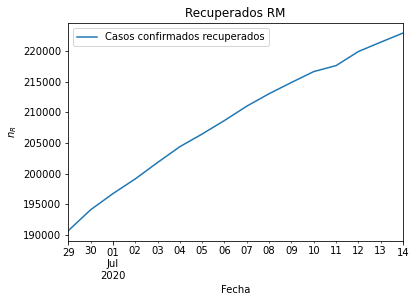

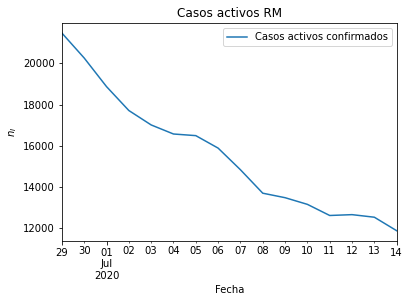

In [7]:
ax1 = df_rm_1.plot(y = 'Casos confirmados recuperados', title = 'Recuperados RM')
ax1.set_ylabel('$n_R$')
ax2 = df_rm_1.plot(y = 'Casos activos confirmados', title = 'Casos activos RM')
ax2.set_ylabel('$n_I$')

In [8]:
pop_rm = 8125072
n_I = df_rm_1['Casos activos confirmados'].values
n_R = df_rm_1['Casos confirmados recuperados'].values
n_S = pop_rm - (n_I + n_R)

In [9]:
dias_datetime = df_rm_1.index

Parte 1: Modelo SIR

In [10]:
# Estimation of parameters
# Se asume que un infectado se recupera o muere de coronavirus en promedio en 14 dias
beta = 1/14 
# Estimación de la OMS de la tasa de reproducción
alpha = 2.5 * beta

# Crear vector de condiciones iniciales
w0 = [n_S[0], n_I[0], n_R[0]]
# Crear vector de parameteros
params = [alpha, beta]
# Inicializar modelo SIR
SIR_RM = SIR()
# Incorporar parametros y condiciones iniciales
SIR_RM.set_params(p=params, initial_conds=w0)

Ajuste del modelo

In [11]:
# Ajuste de parámetros
# Fijamos beta y ajustamos solo el primer parametro alpha
fit_index = [True, False]
# Generamos un vector de dias inicializado en cero a partir del 29 de junio
dias = np.linspace(0,len(n_I)-1, len(n_I))
days_list = dias
# 
SIR_RM.fit(dias, n_I, fit_index=[True, False])

Visualizamos el ajuste del modelo a los datos utilizados para entrenar

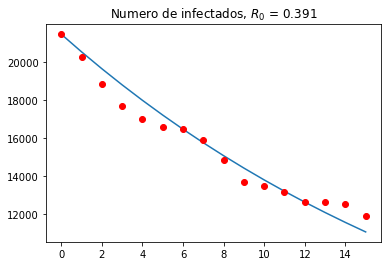

In [12]:
SIR_RM.solve(len(dias)-1,len(dias))
# Extraemos la solucion
sol = SIR_RM.fetch()
# Graficamos los datos ajustados
plt.plot(dias, sol[:,2])
plt.plot(dias, n_I, 'ro')
plt.title('Numero de infectados, $R_0$ = %.3f' % SIR_RM.r0)
plt.show()

### Estimación de casos diarios


Estimamos los nuevos casos diarios utilizando

cd_pred = $\alpha * S * I$

In [13]:
cd_pred = sol[:,1] * sol[:,2] * SIR_RM.p[0] / pop_rm

In [14]:
df_rm_1.insert(df_rm_1.shape[1], 'cd_pred',cd_pred)

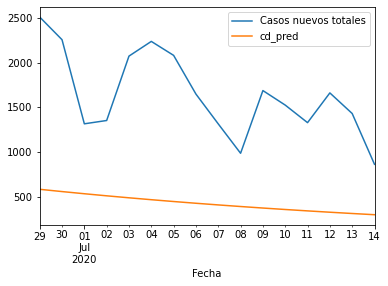

In [15]:
ax = df_rm_1.plot(y = ['Casos nuevos totales', 'cd_pred'])
plt.show()

Observamos que hay un desfase significativo al utilizar la tasa de reproducción efectiva ajustada. Si se utiliza el valor ajustado con SIR-X, $r_0 = 1.025$

In [16]:
alpha_adj = SIR_RM.p[1] * 1.025
cd_pred_adj = sol[:,1] * sol[:,2] * alpha_adj / pop_rm
df_rm_1.insert(df_rm_1.shape[1], 'cd_pred_adj',cd_pred_adj)

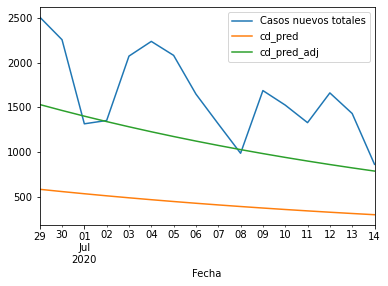

In [17]:
ax = df_rm_1.plot(y = ['Casos nuevos totales', 'cd_pred','cd_pred_adj'])
plt.show()

Hay una gran variabilidad en el número de casos nuevos. Podemos intentar una predicción a 7 días utilizando la función `solve`

In [18]:
future = 7
SIR_RM.solve(len(dias)-1 + future,len(dias) + future)
pred = SIR_RM.fetch()[-7:]         

In [19]:
nuevos_pred = pred[:,1] * pred[:,2] * alpha_adj / pop_rm

In [20]:
pred_days_dt = pd.date_range(start="2020-07-14",end="2020-07-20")

In [21]:
pd.Series?

In [22]:
nuevos_pred_ts = pd.Series(data = nuevos_pred, index=pred_days_dt)

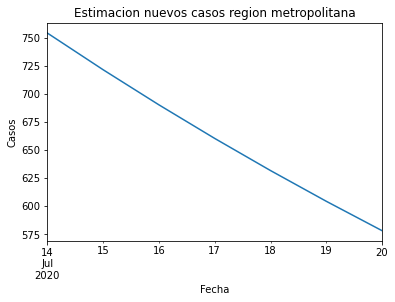

In [23]:
nuevos_pred_ts.plot()
plt.title('Estimacion nuevos casos region metropolitana')
plt.ylabel('Casos')
plt.xlabel('Fecha')
plt.show()

Notar que esta estimación esta sesgada por incertezas en la toma de datos, asi como también muestra que el número de casos activos es mucho menor al número de casos reales. Esto explica la diferencia entre el buen ajuste del modelo SIR a los casos reportados, versus la gran subestimación de casos nuevos. en `cd_pred`

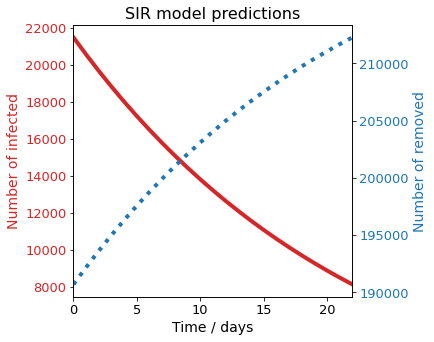

In [24]:
SIR_RM.plot()

### Predicciones

In [25]:
# We previously imported ci_block_cv which provides a better prediction of the mean squared error of the predictions
n_lags=1
MSE_avg, MSE_list, p_list, pred_data = SIR_RM.block_cv(lags=n_lags, min_sample=3)

Predecimos los datos en los proximos 7 dias

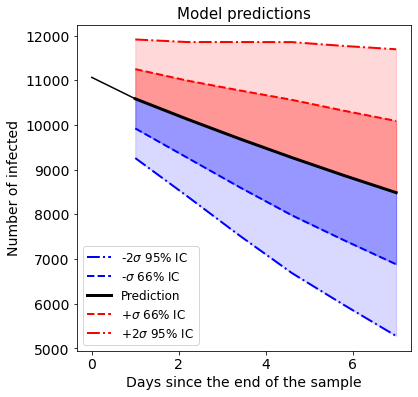

In [26]:
pred_data.plot_predictions(6)

Estas son predicciones de casos totales

### Modelo SIR-X

Para el modelo SIR-X, se requiere el numero de casos totales acumulado

In [27]:
n_X = df_rm_1['Casos acumulados'].values

In [28]:
# Inicializamos un modelo SIRX vacio
SIRX_RM = SIRX()
# Parámetro asociado a la cuarentena
kappa_0 = 0.05 
# Parámetro asociado al seguimiento de contactos
kappa = 0.05 
params_sirx = [alpha, beta, kappa_0, kappa, 1]
# params_sirx = [6.2/8, 1/8, kappa_0, kappa, 1]
# Definimos las condiciones iniciales del modelo SIR-X
# Asumiremos que el numero de casos reportados es igual
# al número de casos activos reales para inicializar el modelo
w0_sirx = (pop_rm - (n_I[0] + n_R[0]), n_I[0], n_R[0], n_X[0])
# Ajustamos todos los parámetros asociados a la cuarentena, fijando
# beta
SIRX_RM.set_params(p = params_sirx, initial_conds = w0_sirx )
fit_index_sirx=[False, False, True, True, True]
SIRX_RM.fit(dias, n_X, fit_index = fit_index_sirx)

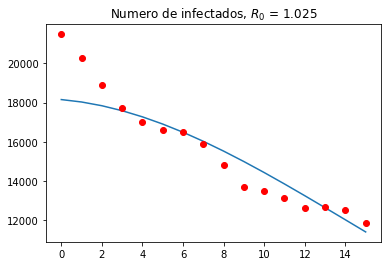

In [29]:
SIRX_RM.solve(len(dias)-1,len(dias))
# Extraemos la solucion
sol_x = SIRX_RM.fetch()

# Graficamos los datos ajustados
plt.plot(dias, sol_x[:,2])
plt.plot(dias, n_I, 'ro')
plt.title('Numero de infectados, $R_0$ = %.3f' % SIRX_RM.r0_eff)
plt.show()

In [30]:
# Perform cross validation on SIR-X model
# We previously imported ci_block_cv which provides a better prediction of the mean squared error of the predictions
n_lags=1
MSE_avg, MSE_list, p_list, pred_data = SIRX_RM.block_cv(lags=n_lags, min_sample=3)

C:\Users\Felipe\anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


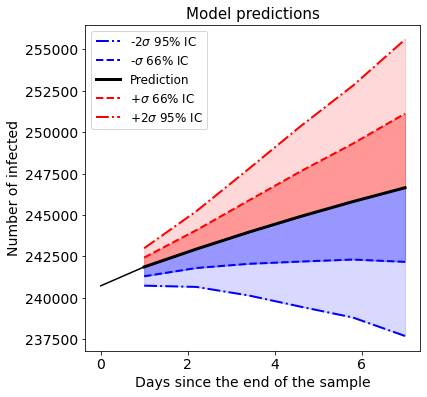

In [31]:
pred_data.plot_predictions(6)